In [18]:
from ccdproc import ImageFileCollection
import ccdproc as ccdp
from astropy.nddata import CCDData
from astropy import units as u
from astropy.timeseries import BinnedTimeSeries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [19]:
cc_com_reduced = './data/cc_com/reduced/'
tz_boo_reduced = './data/tz_boo/reduced/'

def parse_timeseries_data(images_dir):
    images = ImageFileCollection(images_dir)
    images = images.files_filtered(include_path=True)
    
    timestamps = []
    fluxes = []
    for i, path in np.ndenumerate(images):
        image = CCDData.read(path, unit='adu')
        timestamps.append(image.header['DATE-OBS'])
        fluxes.append(image.header['FLUX'])
    
    light_curve = BinnedTimeSeries(
        time_bin_start=timestamps,
        time_bin_size=15*u.s,
        data={
            'DAO flux' : fluxes * u.adu
        }
    )
        
    return light_curve

In [20]:
matplotlib.use('pgf')
matplotlib.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['font.size'] = 12

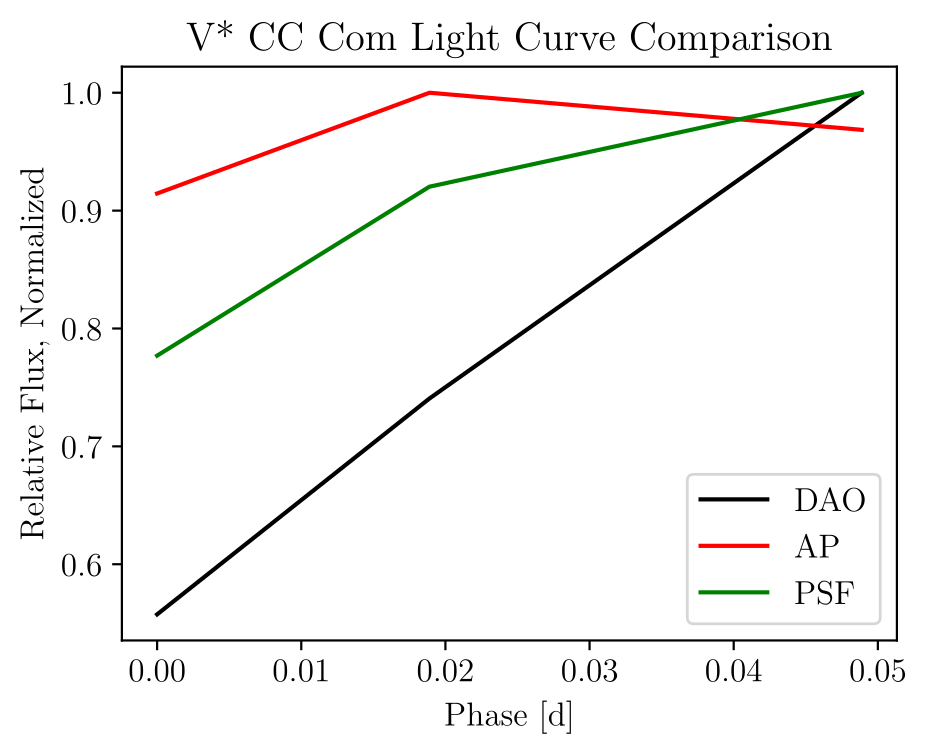

In [26]:
fig, ax = plt.subplots()
cc_lightcurve = BinnedTimeSeries.read(
    './results/cccom_results.csv',
    time_bin_start_column='time_bin_start',
    time_bin_size_column='time_bin_size',
    time_bin_size_unit=u.s
)
time = cc_lightcurve.time_bin_start.jd - cc_lightcurve.time_bin_start.jd.min()
ax.plot(time, cc_lightcurve['DAO flux'] / cc_lightcurve['DAO flux'].max(), 'k-', markersize=4, label='DAO')
ax.plot(time, cc_lightcurve['AP flux'] / cc_lightcurve['AP flux'].max(), 'r-', markersize=4, label='AP')
ax.plot(time, cc_lightcurve['PSF flux'] / cc_lightcurve['PSF flux'].max(), 'g-', markersize=4, label='PSF')
ax.legend()
ax.set_xlabel('Phase [d]')
ax.set_ylabel('Relative Flux, Normalized')
ax.set_title('V* CC Com Light Curve Comparison')
fig.set_size_inches(5,3.8)
fig.savefig('../paper/figures/cc-com_lightcurve-comp.pgf')

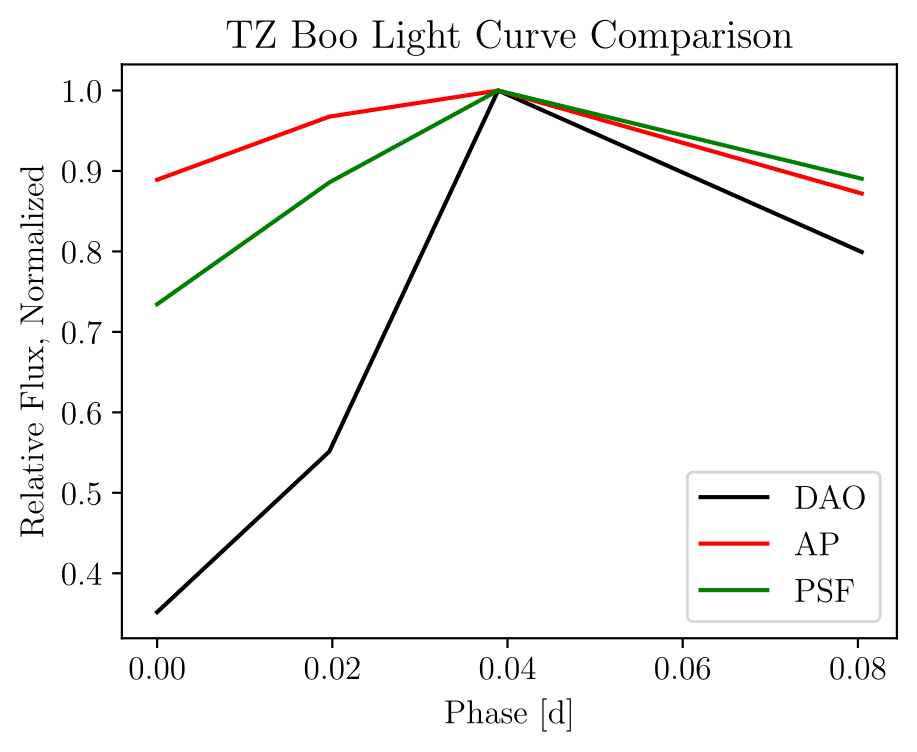

In [27]:
fig, ax = plt.subplots()
tz_lightcurve = BinnedTimeSeries.read(
    './results/tzboo_results.csv',
    time_bin_start_column='time_bin_start',
    time_bin_size_column='time_bin_size',
    time_bin_size_unit=u.s
)

time = tz_lightcurve.time_bin_start.jd - tz_lightcurve.time_bin_start.jd.min()
ax.plot(time, tz_lightcurve['DAO flux'] / tz_lightcurve['DAO flux'].max(), 'k-', markersize=4, label='DAO')
ax.plot(time, tz_lightcurve['AP flux'] / tz_lightcurve['AP flux'].max(), 'r-', markersize=4, label='AP')
ax.plot(time, tz_lightcurve['PSF flux'] / tz_lightcurve['PSF flux'].max(), 'g-', markersize=4, label='PSF')
ax.legend()
ax.set_xlabel('Phase [d]')
ax.set_ylabel('Relative Flux, Normalized')
ax.set_title('TZ Boo Light Curve Comparison')
fig.set_size_inches(5,3.8)
fig.savefig('../paper/figures/tz-boo_lightcurve-comp.pgf')